<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [2]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

<ipython-input-2-b3fdaf15785b>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


# Task 2

## "Median value of owner-occupied homes" boxplot

<AxesSubplot:>

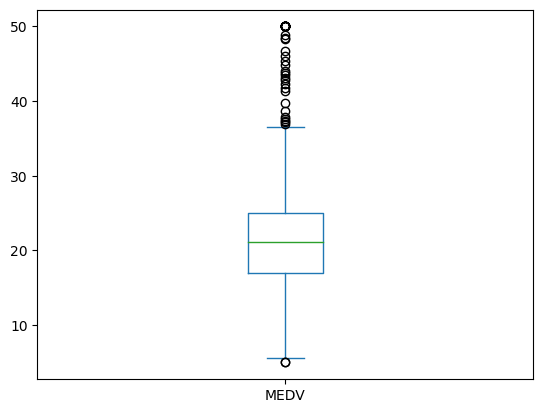

In [7]:
boston_df.MEDV.plot.box()

## Bar plot for the Charles river variable

<AxesSubplot:xlabel='CHAS'>

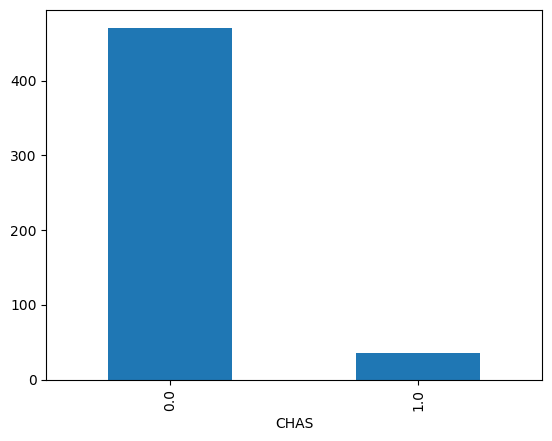

In [12]:
boston_df.CHAS.value_counts().plot.bar()

## Boxplot for the MEDV variable vs the AGE variable. 

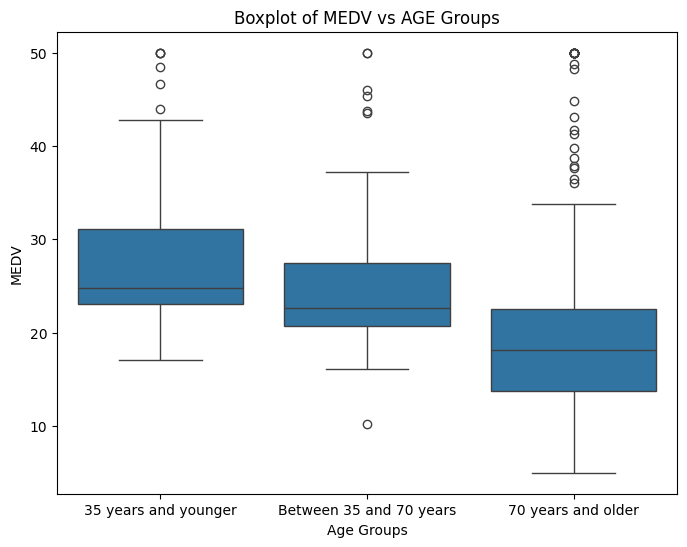

In [18]:
import matplotlib.pyplot as plt

bins = [0, 35, 70, 100] 
labels = ['35 years and younger', 'Between 35 and 70 years', '70 years and older']
boston_df['AGE_Group'] = pd.cut(boston_df['AGE'], bins=bins, labels=labels)

plt.figure(figsize=(8, 6))
sns.boxplot(x='AGE_Group', y='MEDV', data=boston_df)
plt.title("Boxplot of MEDV vs AGE Groups")
plt.xlabel("Age Groups")
plt.ylabel("MEDV")
plt.show()

## Scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town

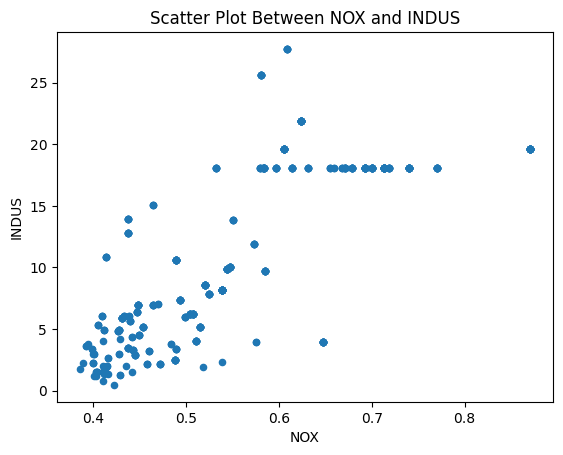

In [21]:
boston_df.plot.scatter(x='NOX', y='INDUS', title="Scatter Plot Between NOX and INDUS")
plt.show()

## Histogram for the pupil to teacher ratio variable

<AxesSubplot:>

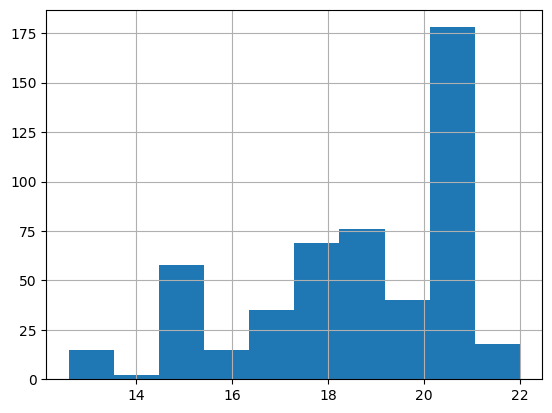

In [22]:
boston_df.PTRATIO.hist()

# Task 3

## Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

In [27]:
from scipy.stats import ttest_ind

bounded = boston_df.loc[boston_df['CHAS'] == 1, 'MEDV']  
not_bounded = boston_df.loc[boston_df['CHAS'] == 0, 'MEDV']  

In [28]:
t_stat, p_value = ttest_ind(bounded, not_bounded, equal_var=False)
print(t_stat)
print(p_value)

3.113291312794837
0.003567170098137517


## Answer: p-value is less than 0.05 hence we reject the NULL hpytohesis and conclude that there is a significant difference in medan values

In [32]:
from scipy.stats import f_oneway

low_age = boston_df.loc[boston_df['AGE_Group'] == '35 years and younger', 'MEDV']
medium_age = boston_df.loc[boston_df['AGE_Group'] == 'Between 35 and 70 years', 'MEDV']
high_age = boston_df.loc[boston_df['AGE_Group'] == '70 years and older', 'MEDV']

In [34]:
f_stat, p_value = f_oneway(low_age, medium_age, high_age)

print(f_stat)
print(p_value)

36.40764999196599
1.7105011022702984e-15


## Answer: p-value is less than 0.05 hence we reject the NULL hpytohesis and conclude that there is a significant difference in medan values among age groups

## Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

In [35]:
from scipy.stats import pearsonr

In [37]:
corr, p_value = pearsonr(boston_df['NOX'], boston_df['INDUS'])

print(corr)
print(p_value)

0.7636514469209192
7.913361061210442e-98


## Answer: p-value is less than 0.05 hence we reject the NULL hpytohesis and conclude that there is a significant statistical relationship between NOX and INDUS